# 0. Install and Import Dependencies

In [152]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.2.2
altair                       4.2.2
anyio                        4.9.0
argon2-cffi                  23.1.0
arrow                        1.3.0
asttokens                    3.0.0
async-lru                    2.0.5
attrs                        25.3.0
babel                        2.17.0
backcall                     0.2.0
beautifulsoup4               4.13.3
cachetools                   5.5.2
certifi                      2025.1.31
charset-normalizer           3.4.1
colorama                     0.4.6
comm                         0.2.2
comtypes                     1.4.10
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.13
decorator                    5.1.1
entrypoints                  0.4
exceptiongroup               1.2.0
executing                    0.8.3
fastjsonschema               2.21.1
filelock                     3.18.

In [14]:
import numpy as np
import tensorflow as tf

print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)



NumPy version: 1.26.4
TensorFlow version: 2.15.1


In [3]:
!pip install opencv-python matplotlib imageio gdown tensorflow

  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\chara\\anaconda3\\envs\\lipnet_env\\lib\\site-packages\\tensorflow-2.10.0.dist-info\\METADATA'



In [15]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio
#43686172616e6468656570

In [16]:
tf.config.list_physical_devices('GPU')

[]

In [17]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# 1. Build Data Loading Functions

In [157]:
import gdown

In [158]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL 



['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [18]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [19]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [20]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)


The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [21]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [22]:
char_to_num(['n','i','c','k'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  9,  3, 11], dtype=int64)>

In [23]:
num_to_char([14,  9,  3, 11])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'i', b'c', b'k'], dtype=object)>

In [24]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [25]:
def load_data(path: str): 
    path = bytes.decode(path.numpy())
    #file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows 43686172616e6468656570
    file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [26]:
test_path = '.\\data\\s1\\bbal6n.mpg'

In [27]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

'bbal6n'

In [28]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

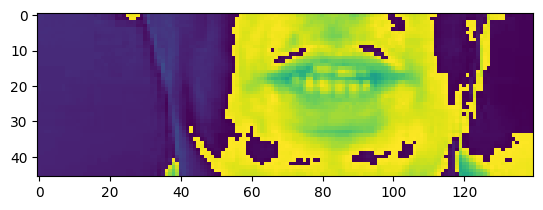

In [29]:
plt.imshow(frames[40])

In [30]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23], dtype=int64)>

In [31]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [32]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# 2. Create Data Pipeline

In [33]:
from matplotlib import pyplot as plt

In [34]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 43686172616e6468656570
train = data.take(450)
test = data.skip(450)

In [35]:
len(test)

50

In [36]:
frames, alignments = data.as_numpy_iterator().next()

In [37]:
len(frames)

2

In [38]:
sample = data.as_numpy_iterator()

In [39]:
val = sample.next(); val[0]

array([[[[[1.452607  ],
          [1.452607  ],
          [1.4908335 ],
          ...,
          [9.709531  ],
          [0.26758552],
          [0.26758552]],

         [[1.452607  ],
          [1.452607  ],
          [1.4908335 ],
          ...,
          [9.633079  ],
          [0.26758552],
          [0.458718  ]],

         [[1.452607  ],
          [1.452607  ],
          [1.4908335 ],
          ...,
          [0.1146795 ],
          [0.26758552],
          [0.26758552]],

         ...,

         [[0.9556625 ],
          [0.9556625 ],
          [0.9556625 ],
          ...,
          [0.0382265 ],
          [0.        ],
          [0.        ]],

         [[0.9556625 ],
          [0.9556625 ],
          [0.9556625 ],
          ...,
          [9.747758  ],
          [9.747758  ],
          [9.747758  ]],

         [[0.9556625 ],
          [0.9556625 ],
          [0.9556625 ],
          ...,
          [9.747758  ],
          [9.747758  ],
          [9.747758  ]]],


        [[[1.4908

In [40]:
frames_uint8 = (val[0][0][:, :, :, 0] * 255).astype(np.uint8)
imageio.mimsave('./animation.gif', frames_uint8, fps=10)

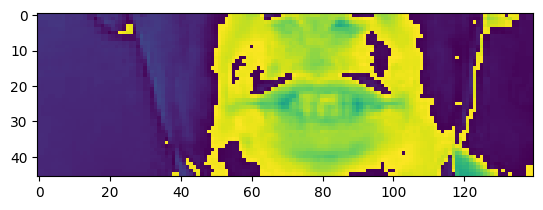

In [41]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
plt.imshow(val[0][0][35])

In [42]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'place red by j four now'>

# 3. Design the Deep Neural Network

In [43]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [44]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [45]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))
#43686172616e6468656570
model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128   3584      
                             )                                   
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128   0         
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 75, 23, 70, 128)   0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                        

In [47]:
5*17*75

6375

In [48]:
yhat = model.predict(val[0])

1/1 [==============================] - 11s 11s/step


In [49]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'44444444444444444444444444444444444444444444444444444444444444444qqqqqqqqqq'>

In [50]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'44444444444444444444444444444444444444444444444444444444444444444qqqqqqqqqq'>

In [51]:
model.input_shape

(None, 75, 46, 140, 1)

In [52]:
model.output_shape

(None, 75, 41)

# 4. Setup Training Options and Train

In [53]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [54]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [55]:
class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
        #43686172616e6468656570
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [56]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [57]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) 

In [58]:
schedule_callback = LearningRateScheduler(scheduler)

In [59]:
example_callback = ProduceExample(test)

In [135]:
model.fit(train, validation_data=test, epochs=100, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/100


KeyboardInterrupt: 

# 5. Make a Prediction 

In [60]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

NameError: name 'gdown' is not defined

In [61]:
model.load_weights('models/checkpoint')

In [62]:
test_data = test.as_numpy_iterator()

In [63]:
sample = test_data.next()

In [64]:
yhat = model.predict(sample[0])

1/1 [==============================] - 12s 12s/step


In [65]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin white with a eight now'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'bin green by n eight now'>]

In [66]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [67]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin white with a eight now'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'bin green by n n eight now'>]

# Test on a Video

In [2]:
import sys
print(sys.executable)

C:\Users\chara\AppData\Local\Programs\Python\Python311\python.exe


In [68]:
pip install ipython

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\chara\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [69]:
pip install pyttsx3

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyttsx3 in c:\users\chara\appdata\local\programs\python\python311\lib\site-packages (2.98)




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\chara\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [73]:
import pyttsx3
from IPython.display import display, Audio
#testing and converting the predictions to speech

def test_video(sample, speed_factor=0.8):
    """
    Tests the LipNet model on a video sample, prints the real and predicted text,
    and converts the predicted text to speech with adjustable speed.

    Args:
        sample: The video sample to test.
        speed_factor (float): Factor to adjust the speech speed (e.g., 1.0 for normal, 0.5 for half speed).
    """
    print('~'*10, 'REAL TEXT','~'*10)
    real_text = tf.strings.reduce_join([num_to_char(word) for word in sample[1]]).numpy().decode('utf-8')
    print(real_text)
    
    yhat = model.predict(tf.expand_dims(sample[0], axis=0))
    decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()
    predicted_text = tf.strings.reduce_join([num_to_char(word) for word in decoded]).numpy().decode('utf-8')
    print('~'*10, 'PREDICTIONS','~'*10)
    print(predicted_text)
    
    # Text-to-Speech with pyttsx3 and adjustable speed* 43686172616e6468656570
    try:
        engine = pyttsx3.init()
        voices = engine.getProperty('voices')
        selected_voice = None
        for voice in voices:
            if 'en-GB' in voice.languages and voice.gender == 'male':
                selected_voice = voice.id
                break
        if selected_voice:
            engine.setProperty('voice', selected_voice)
            print("Using male British voice")
        else:
            print("No male British voice found, using default voice")
        
        # Adjust speech rate
        current_rate = engine.getProperty('rate')
        new_rate = int(current_rate * speed_factor)
        engine.setProperty('rate', new_rate)
        print(f"Speech rate adjusted to {new_rate} (from {current_rate})")
        
        # Save speech to file
        engine.save_to_file(predicted_text, 'predicted_speech.mp3')
        engine.runAndWait()
        print("Speech saved as 'predicted_speech.mp3'")
        
        # Play the audio in the notebook
        display(Audio('predicted_speech.mp3', autoplay=True))
    except Exception as e:
        print(f"Error during text-to-speech conversion: {e}")

In [75]:
sample = load_data(tf.convert_to_tensor('.\\data\\s1\\lbad8p.mpg'))
test_video(sample)

~~~~~~~~~~ REAL TEXT ~~~~~~~~~~
lay blue at d eight please
1/1 [==============================] - 3s 3s/step
~~~~~~~~~~ PREDICTIONS ~~~~~~~~~~
lay blue at d eight please
No male British voice found, using default voice
Speech rate adjusted to 160 (from 200)
Speech saved as 'predicted_speech.mp3'
